# Trabalho Prático 03 - Implementação de Redes Neurais (NN e CNN)

- Giovanna Louzi Bellonia - 2017086015
- Thiago Martin Poppe - 2017014324

In [1]:
import keras

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import cifar10

from keras.optimizers import SGD

from keras import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


## Implementação de uma classe para ler os dados do CIFAR-10

- Baseado na leitura dos dados do MNIST presente nos slides

In [2]:
class Cifar10:
    """ Class to read CIFAR-10 data """
    
    @staticmethod
    def read_data():
        """ Static method to read the data """

        (train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

        train_images = train_images.astype('float32')
        test_images = test_images.astype('float32')
        train_images /= 255
        test_images /= 255
        
        # Criando os vetores de one-hot
        train_labels = np_utils.to_categorical(train_labels, 10)
        test_labels = np_utils.to_categorical(test_labels, 10)

        return (train_images, train_labels), (test_images, test_labels)

## Implementação de uma classe para criar uma arquitetura LeNet-5
- Nos baseamos na segunda versão da LeNet-5 disponibilizada nos slides.
- A arquitetura consiste em 2 níves de convolução, com 20 e 50 filtros respectivamente (sempre seguidos de ReLU e MaxPooling2D 2x2).
- Em seguida temos uma fully connected com 500 "neurônios", seguida de uma ReLU para introduzir a não linearidade nos dados.
- No final temos uma fully connected com 10 "neurônios", um para cada classe do nosso dataset. Terminamos com uma softmax para converter os valores em probabilidades.

In [3]:
class LeNet:
    """ Implementation of architecture LeNet-5 """

    @staticmethod
    def build(nRows=32, nCols=32, nChannels=3, nClasses=10, opt='sgd', activation='relu'):
        """ Static method to create LeNet-5 model """

        # Criando um modelo sequencial
        model = keras.Sequential()

        # Adicionando uma camada convolucional, relu e max pooling
        model.add(Conv2D(20, 5, padding='same', input_shape=(nRows, nCols, nChannels)))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando mais uma camada convolucional, relu e max pooling
        model.add(Conv2D(50, 5, padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando nossa camada fully connected
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation(activation))

        # Adicionando a segunda camada fully connected (final)
        model.add(Dense(nClasses))
        model.add(Activation('softmax'))

        # Compilando o modelo
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        return model

## Implementação de uma classe para criar nossa primeira arquitetura NN
- Nos baseamos na arquitetura da NN feita para classificar dados do MNIST de digitos.
- A nossa primeira arquitetura consiste em 3 hidden layers, com 64, 128 e 64 "neurônios" respectivamente (sempre seguidos de uma ReLU para introduzir a não linearidade nos dados).
- No final temos uma fully connected com 10 "neurônios", um para cada classe do nosso dataset. Terminamos com uma softmax para converter os valores em probabilidades.

In [4]:
class MyFirstNN:
    """ Implementation of our own NN a architecture """

    @staticmethod
    def build(nRows=32, nCols=32, nChannels=3, nClasses=10, opt='sgd', activation='relu'):
        """ Static method to create our own NN model """

        # Criando um modelo sequencial
        model = Sequential()

        # Adicionando uma hidden layer com 64 nodes
        model.add(Flatten())
        model.add(Dense(64, input_shape=(nRows, nCols, nChannels)))
        model.add(Activation(activation))

        # Adicionando uma hidden layer com 128 nodes
        model.add(Dense(128))
        model.add(Activation(activation))

        # Adicionando uma hidden layer com 64 nodes
        model.add(Dense(64))
        model.add(Activation(activation))

        # Adicionando um fully connected (final)
        model.add(Dense(nClasses))
        model.add(Activation('softmax'))

        # Compilando o modelo
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        return model

## Implementação de uma classe para criar nossa segunda arquitetura NN
- Nos baseamos no site https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c para construir essa arquitetura.
- Ela é mais complexa que a anterior, possuindo 3 hidden layers com 128, 256 e 512 "neurônios" respectivamente (sempre seguidos de uma ReLU para introduzir a não linearidade nos dados).
- No final temos uma fully connected com 10 "neurônios", um para cada classe do nosso dataset. Terminamos com uma softmax para converter os valores em probabilidades.

In [5]:
class MySecondNN:
    """ Implementation of our own NN a architecture """

    @staticmethod
    def build(nRows=32, nCols=32, nChannels=3, nClasses=10, opt='sgd', activation='relu'):
        """ Static method to create our own NN model """

        # Criando um modelo sequencial
        model = Sequential()

        # Adicionando uma hidden layer com 128 nodes
        model.add(Flatten())
        model.add(Dense(128, input_shape=(nRows, nCols, nChannels)))
        model.add(Activation(activation))

        # Adicionando uma segunda hidden layer com 256 nodes
        model.add(Dense(256))
        model.add(Activation(activation))

        # Adicionando uma terceira hidden layer com 512 nodes
        model.add(Dense(512))
        model.add(Activation(activation))

        # Adicionando uma fully connected (final)
        model.add(Dense(nClasses))
        model.add(Activation('softmax'))

        # Compilando o modelo
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        return model

## Implementação de uma classe para criar nossa primeira arquitetura CNN
- Nos baseamos na arquitetura da LeNet-5 para criar a mesma.
- A nossa primeira arquitetura consiste em 4 níves de convolução, com 16, 32, 64 e 128 filtros respectivamente (sempre seguidos de ReLU e MaxPooling2D 2x2).
- Em seguida temos uma fully connected com 512 "neurônios", seguida de uma ReLU para introduzir a não linearidade nos dados.
- No final temos uma fully connected com 10 "neurônios", um para cada classe do nosso dataset. Terminamos com uma softmax para converter os valores em probabilidades.

In [6]:
class MyFirstCNN:
    """ Implementation of our own CNN architecture """

    @staticmethod
    def build(nRows=32, nCols=32, nChannels=3, nClasses=10, opt='sgd', activation='relu'):
        """ Static method to create our own CNN model """

        # Criando um modelo sequencial
        model = keras.Sequential()

        # Adicionando uma camada convolucional, relu e max pooling
        model.add(Conv2D(16, 5, padding='same', input_shape=(nRows, nCols, nChannels)))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando uma camada convolucional, relu e max pooling
        model.add(Conv2D(32, 5, padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando mais uma camada convolucional, relu e max pooling
        model.add(Conv2D(64, 5, padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando mais uma camada convolucional, relu e max pooling
        model.add(Conv2D(128, 5, padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando nossa camada fully connected
        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation(activation))

        # Adicionando a segunda camada fully connected (final)
        model.add(Dense(nClasses))
        model.add(Activation('softmax'))

        # Compilando o modelo
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        return model

## Implementação de uma classe para criar nossa segunda arquitetura CNN
- Nos baseamos no site https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c para construir essa arquitetura.
- Ela é mais complexa que a anterior, consistindo de 4 níves de convolução, com 16, 32, 64 e 128 filtros respectivamente (sempre seguidos de ReLU e MaxPooling2D 2x2).
- Em seguida temos 3 hidden layers com 128, 256 e 512 "neurônios" respectivamente (sempre seguidos de uma ReLU para introduzir a não linearidade nos dados).
- No final temos uma fully connected com 10 "neurônios", um para cada classe do nosso dataset. Terminamos com uma softmax para converter os valores em probabilidades.

In [7]:
class MySecondCNN:
    """ Implementation of our own NN a architecture """

    @staticmethod
    def build(nRows=32, nCols=32, nChannels=3, nClasses=10, opt='sgd', activation='relu'):
        """ Static method to create our own NN model """

        # Criando um modelo sequencial
        model = Sequential()

        # Adicionando uma camada convolucional, relu e max pooling
        model.add(Conv2D(16, 3, padding='same', input_shape=(nRows, nCols, nChannels)))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando uma camada convolucional, relu e max pooling
        model.add(Conv2D(32, 3, padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando mais uma camada convolucional, relu e max pooling
        model.add(Conv2D(64, 3, padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando mais uma camada convolucional, relu e max pooling
        model.add(Conv2D(128, 3, padding='same'))
        model.add(Activation(activation))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

        # Adicionando as camadas fully connected
        model.add(Flatten())
        model.add(Dense(128, input_shape=(nRows, nCols, nChannels)))
        model.add(Activation(activation))

        model.add(Dense(256))
        model.add(Activation(activation))

        model.add(Dense(512))
        model.add(Activation(activation))

        # Adicionando um fully connected (final)
        model.add(Dense(nClasses))
        model.add(Activation('softmax'))

        # Compilando o modelo
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        return model

## Escolha dos hiper-parâmetros (learning rate, epoch, batch size)

- Para escolhermos os melhores hiper-parâmetros para cada arquitetura usamos uma abordagem de grid search.
- Tentamos utilizar a biblioteca scikit-learn para tal, mas não funcionou como esperavamos. Então, optamos por implementar na mão essa mesma ideia.
- Resolvemos iterar por exemplo entre os seguintes valores:

| learning rate | epochs | batch size |
|---------------|--------|------------|
|      0.1      |   10   |     64     |
|      0.01     |   20   |    128     |
|      0.001    |   30   |    256     |

- Para uma visualização melhor, treinamos cada uma das redes e usamos o TensorBoard para visualizar o aprendizado com o passar das épocas. O resultado foi o seguinte:

### Acurácia no treino
![Results train accuracy](result_acc.png)

### Loss no treino
![Results train loss](result_loss.png)

### Acurácia na validação
![Results validation accuracy](result_val_acc.png)

### Loss na validação

![Results validation loss](result_val_loss.png)

- Conseguimos perceber nos plots acima que possuimos um overfit para as redes convolucionais e um underfit para as redes não convolucionais. Testamos treinar com menos épocas e learning rates mais baixos, mas não conseguimos um resultado melhor do que ~68% na acurácia dos testes (este, obtido pelas CNN).

- Tentamos treinar até a época onde a loss começa a crescer novamente e a acurácia a diminuir. Porém, no geral, os resultados foram menores do que os vistos usando esses hiper parâmetros a seguir:


|             | learning rate | epochs | batch size || accuracy (test) | loss (test) |
|-------------|---------------|--------|------------||-----------------|-------------|
|  LeNet-5    | 0.01          | 30     | 64         || 0.65            | 1.30        |
| MyFirstNN   | 0.01          | 30     | 128        || 0.48            | 1.44        |
| MySecondNN  | 0.01          | 30     | 64         || 0.51            | 1.40        |
| MyFirstCNN  | 0.01          | 30     | 64         || 0.64            | 1.50        |
| MySecondCNN | 0.01          | 30     | 64         || 0.67            | 1.08        |


- Mesmo com a melhoria nos resultados, o tempo de treinamento entre redes mais simples foi menor do que em suas versões mais complexas. Sendo assim, devemos realizar um trade-off entre tempo de treino e resultado obtido. Visto que, a melhoria foi de ~3% em média nos testes, talvez fosse melhor optar por uma rede mais simples.

- Com base na tabela acima, fomos capazes de ajustar na mão os hiper parâmetros afim de obter resultados melhores. Por exemplo, para a LeNet-5 encontramos que um learning rate de 0.0025, 25 épocas e batch size igual a 32 no possibilitou um resultado com bem menos overfit (ao invés de termos uma acurácia de ~90% nos treinos tivemos de ~70%) e com acurácia e loss similares aos testes passados, as vezes até melhores que 65% e 1.30, principalmente quanto a loss que fica bem próximo de 1, ficando assim ~23% melhor que o valor observado na tabela acima.

## Matrizes de confusão

- Aqui mostraremos a matriz de confusão para MySecondNN e MySecondCNN, visto que as mesmas foram as que se saíram melhor no teste dentro das suas "categorias", ou seja, NN e CNN.
- Também mostraremos a matriz de confusão para a LeNet-5 para podermos comparar com as demais redes

### Função para plotar um mapa de calor

In [8]:
def heatmap(cm, classes):
    """
        Plots confusion matrix in the form of a heatmap
        
        Params:
        ------
        cm : confusion matrix (Tensor)
        classes : data classes (list)
    """
    
    # Normalizando a matriz de confusão
    cm = tf.Session().run(cm)
    cm = np.around(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis], decimals=2)
    
    # Criando um dataframe com os dados
    cm_df = pd.DataFrame(cm,
                         index=classes,
                         columns=classes)
    
    # Criando o heatmap
    figure = plt.figure(figsize=(8, 8))
    ax = sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.tight_layout()
    
    # Exibindo o heatmap
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Lendo os dados do CIFAR-10

In [9]:
(train_images, train_labels), (test_images, test_labels) = Cifar10.read_data()
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### LeNet-5 (hiper parâmetros melhorados)

In [10]:
# Construindo o modelo e treinando o mesmo
model = LeNet.build(opt=SGD(lr=0.0025))
model.fit(train_images, train_labels,
          epochs=25,
          batch_size=32,
          validation_data=(test_images, test_labels), 
          verbose=2)

# Exibindo os resultados no teste
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\ntest_acc:', test_acc)
print('test_loss:', test_loss)

# Classificando as imagens
_, (_, true_labels) = cifar10.load_data()
preds = model.predict_classes(test_images)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 50000 samples, validate on 10000 samples
Epoch 1/25





 - 12s - loss: 2.0920 - acc: 0.2507 - val_loss: 1.8899 - val_acc: 0.3403
Epoch 2/25
 - 10s - loss: 1.7811 - acc: 0.3740 - val_loss: 1.6691 - val_acc: 0.4108
Epoch 3/25
 - 10s - loss: 1.6182 - acc: 0.4292 - val_loss: 1.5659 - val_acc: 0.4403
Epoch 4/25
 - 10s - loss: 1.5076 - acc: 0.4615 - val_loss: 1.4634 - val_acc: 0.4774
Epoch 5/25
 - 10s - loss: 1.4296 - acc: 0.4914 - val_loss: 1.5399 - val_acc: 0.4599
Epoch 6/25
 - 10s - loss: 1.3728 - acc: 0.5111 - val_loss: 1.3416 - val_acc: 0.5292
Epoch 7/25
 - 10s - loss: 1.3232 - acc: 0.5322 - val_loss: 1.3247 - val_acc: 0.5223
Epoch 8/25
 - 10s - loss: 1.2810 - acc: 0.5489 - val_loss: 1.3096 - val_acc: 0.5313
Epoch 9/25
 - 10s - loss: 1.2417 - acc: 0.5614 - val_loss: 1.2361 - val_acc: 0.5621
Epoch 10/25
 - 10s - loss: 1.2055 - acc: 0.5763 - val_loss: 1.2309 - val_acc: 0.5641
E

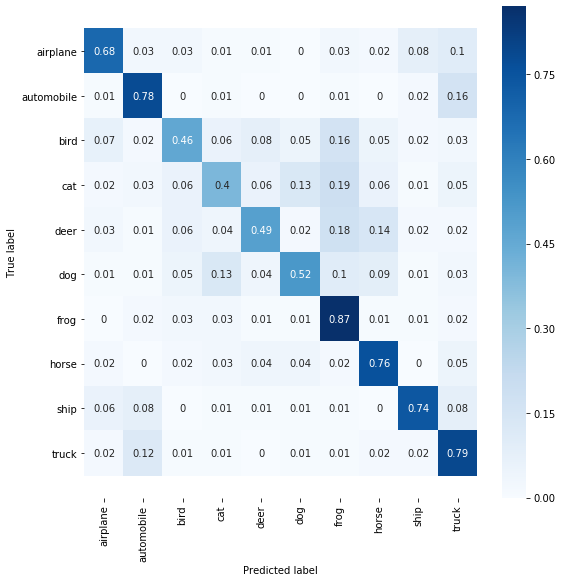

In [11]:
# Criando a matriz de confusão
confusion_matrix = tf.math.confusion_matrix(labels=true_labels, predictions=preds)
heatmap(confusion_matrix, classes)

- Podemos perceber pela matriz de confusão acima que a rede num geral se sai com uma acurácia razoável para cada classe do dataset.
- Percebemos que a mesma costuma confundir coisas similares, como por exemplo caminhões com carros e até mesmo gatos com cachorros.

### MySecondNN (hiper parâmetros melhorados)

In [12]:
# Construindo o modelo e treinando o mesmo
model = MySecondNN.build(opt=SGD(lr=0.015))
model.fit(train_images, train_labels,
          epochs=30,
          batch_size=64,
          validation_data=(test_images, test_labels), 
          verbose=2)

# Exibindo os resultados no teste
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\ntest_acc:', test_acc)
print('test_loss:', test_loss)

# Classificando as imagens
_, (_, true_labels) = cifar10.load_data()
preds = model.predict_classes(test_images)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 1.9477 - acc: 0.3009 - val_loss: 1.8742 - val_acc: 0.3227
Epoch 2/30
 - 4s - loss: 1.7542 - acc: 0.3758 - val_loss: 1.7694 - val_acc: 0.3670
Epoch 3/30
 - 4s - loss: 1.6678 - acc: 0.4067 - val_loss: 1.7706 - val_acc: 0.3660
Epoch 4/30
 - 4s - loss: 1.6083 - acc: 0.4283 - val_loss: 1.6719 - val_acc: 0.4103
Epoch 5/30
 - 4s - loss: 1.5629 - acc: 0.4444 - val_loss: 1.6450 - val_acc: 0.4097
Epoch 6/30
 - 4s - loss: 1.5219 - acc: 0.4594 - val_loss: 1.5674 - val_acc: 0.4359
Epoch 7/30
 - 4s - loss: 1.4905 - acc: 0.4689 - val_loss: 1.5823 - val_acc: 0.4381
Epoch 8/30
 - 4s - loss: 1.4606 - acc: 0.4796 - val_loss: 1.4896 - val_acc: 0.4680
Epoch 9/30
 - 4s - loss: 1.4368 - acc: 0.4892 - val_loss: 1.5546 - val_acc: 0.4511
Epoch 10/30
 - 4s - loss: 1.4110 - acc: 0.4989 - val_loss: 1.5686 - val_acc: 0.4331
Epoch 11/30
 - 4s - loss: 1.3897 - acc: 0.5058 - val_loss: 1.5666 - val_acc: 0.4366
Epoch 12/30
 - 4s - loss: 1.3710 - 

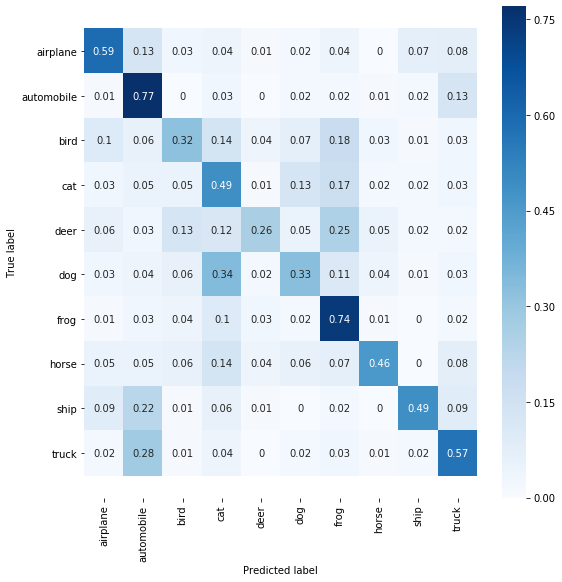

In [13]:
# Criando a matriz de confusão
confusion_matrix = tf.math.confusion_matrix(labels=true_labels, predictions=preds)
heatmap(confusion_matrix, classes)

- Percebemos que essa rede se saiu pior na classificação do que a LeNet-5, indo bem apenas na classificação de algumas classes específicas.
- Percebemos que a mesma costuma confundir ainda mais as coisas similares, como por exemplo caminhões com carros e até mesmo gatos com cachorros.

### MySecondCNN (hiper parâmetros melhorados)

In [14]:
# Construindo o modelo e treinando o mesmo
model = MySecondCNN.build(opt=SGD(lr=0.0025))
model.fit(train_images, train_labels,
          epochs=35,
          batch_size=30,
          validation_data=(test_images, test_labels), 
          verbose=2)

# Exibindo os resultados no teste
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)
print('\ntest_acc:', test_acc)
print('test_loss:', test_loss)

# Classificando as imagens
_, (_, true_labels) = cifar10.load_data()
preds = model.predict_classes(test_images)

Train on 50000 samples, validate on 10000 samples
Epoch 1/35
 - 14s - loss: 2.3009 - acc: 0.1184 - val_loss: 2.2989 - val_acc: 0.1450
Epoch 2/35
 - 13s - loss: 2.2958 - acc: 0.1637 - val_loss: 2.2910 - val_acc: 0.1588
Epoch 3/35
 - 13s - loss: 2.2728 - acc: 0.1994 - val_loss: 2.2247 - val_acc: 0.2247
Epoch 4/35
 - 13s - loss: 2.0667 - acc: 0.2531 - val_loss: 1.9536 - val_acc: 0.2847
Epoch 5/35
 - 13s - loss: 1.8985 - acc: 0.3041 - val_loss: 1.9654 - val_acc: 0.3065
Epoch 6/35
 - 13s - loss: 1.7578 - acc: 0.3618 - val_loss: 1.6414 - val_acc: 0.4041
Epoch 7/35
 - 13s - loss: 1.6380 - acc: 0.4061 - val_loss: 1.6785 - val_acc: 0.4061
Epoch 8/35
 - 13s - loss: 1.5534 - acc: 0.4360 - val_loss: 1.5240 - val_acc: 0.4430
Epoch 9/35
 - 13s - loss: 1.4916 - acc: 0.4590 - val_loss: 1.4751 - val_acc: 0.4700
Epoch 10/35
 - 13s - loss: 1.4404 - acc: 0.4791 - val_loss: 1.4246 - val_acc: 0.4890
Epoch 11/35
 - 13s - loss: 1.3968 - acc: 0.4945 - val_loss: 1.4248 - val_acc: 0.5029
Epoch 12/35
 - 13s - los

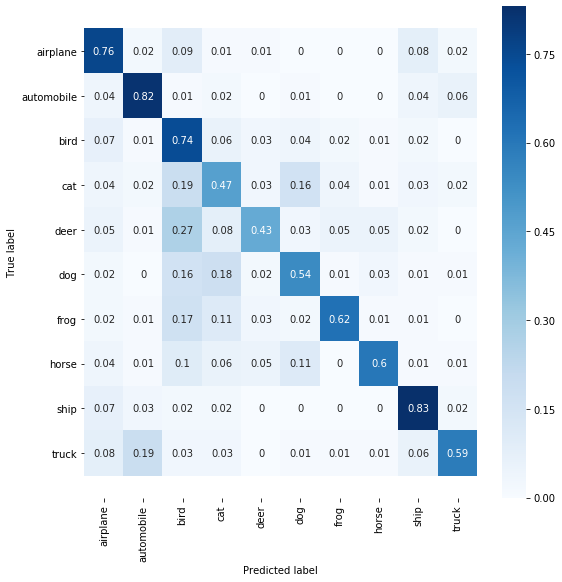

In [15]:
# Criando a matriz de confusão
confusion_matrix = tf.math.confusion_matrix(labels=true_labels, predictions=preds)
heatmap(confusion_matrix, classes)

- Percebemos que essa rede se saiu melhor na classificação do que a sem convolução.
- Percebemos que a mesma ainda confunde as coisas similares, como por exemplo caminhões com carros e até mesmo gatos com cachorros.